In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms

In [15]:
# 定义网络结构
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.fc1 = nn.Linear(64 * 5 * 5, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x, 2)
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x, 2)
        x = x.view(-1, 64 * 5 * 5)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [16]:
import torch
import torchvision.transforms as transforms

# 导入FashionMNIST数据集
train_dataset = datasets.FashionMNIST(root='./data', train=True, transform=None)
test_dataset = datasets.FashionMNIST(root='./data', train=False, transform=None)

# 使用transforms对数据集进行标准化
mean = train_dataset.data.float().mean() / 255
print(mean) # tensor(0.2860)
std = train_dataset.data.float().std() / 255
print(std) # tensor(0.3530)

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((mean,), (std,))
])

train_dataset.transform = transform
test_dataset.transform = transform

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)


tensor(0.2860)
tensor(0.3530)


In [20]:
from torch.optim.lr_scheduler import CosineAnnealingLR

# 定义模型、损失函数和优化器
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())
# scheduler = CosineAnnealingLR(optimizer, T_max=len(train_loader)*10, eta_min=0.0)

# 训练模型
train_loss_history = []
train_acc_history = []
test_acc_history = []
for epoch in range(20):
    running_loss = 0.0
    total_train = 0.0
    correct_train = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted_train = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()
    # scheduler.step()
    # 计算训练集精度和测试集精度
    train_accuracy = 100 * correct_train / total_train
    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            outputs = net(images)
            _, predicted_test = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted_test == labels).sum().item()
    test_accuracy = 100 * correct_test / total_test
    
    # 将训练集loss、训练集精度和测试集精度加入列表
    train_loss_history.append(running_loss / len(train_loader))
    train_acc_history.append(train_accuracy)
    test_acc_history.append(test_accuracy)
    
    print('Epoch %d, Training Loss: %.3f, Training Accuracy: %.3f%%, Test Accuracy: %.3f%%' % (epoch+1, running_loss/len(train_loader), train_accuracy, test_accuracy))

epoch 1 loss: 0.432 train accuracy: 84.12% test accuracy: 87.76%
epoch 2 loss: 0.288 train accuracy: 89.43% test accuracy: 89.08%
epoch 3 loss: 0.244 train accuracy: 90.97% test accuracy: 90.38%
epoch 4 loss: 0.211 train accuracy: 92.12% test accuracy: 91.06%
epoch 5 loss: 0.185 train accuracy: 93.02% test accuracy: 91.00%
epoch 6 loss: 0.159 train accuracy: 93.91% test accuracy: 91.35%
epoch 7 loss: 0.140 train accuracy: 94.84% test accuracy: 90.72%
epoch 8 loss: 0.121 train accuracy: 95.42% test accuracy: 90.85%
epoch 9 loss: 0.104 train accuracy: 96.06% test accuracy: 90.72%
epoch 10 loss: 0.092 train accuracy: 96.61% test accuracy: 90.69%
epoch 11 loss: 0.080 train accuracy: 96.96% test accuracy: 91.08%
epoch 12 loss: 0.071 train accuracy: 97.34% test accuracy: 90.77%
epoch 13 loss: 0.063 train accuracy: 97.62% test accuracy: 91.14%
epoch 14 loss: 0.055 train accuracy: 97.91% test accuracy: 90.59%
epoch 15 loss: 0.050 train accuracy: 98.16% test accuracy: 91.32%
epoch 16 loss: 0.04

Text(0, 0.5, 'Loss')

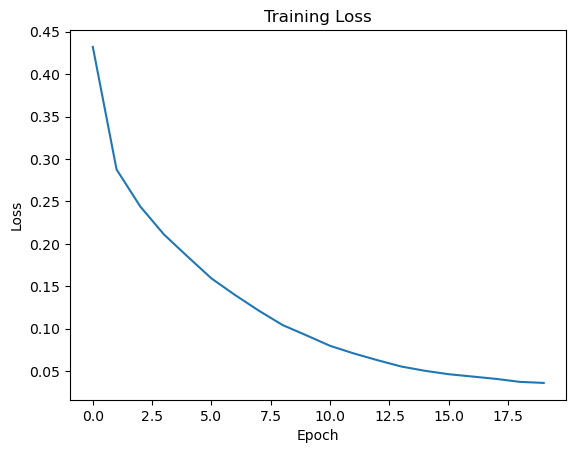

In [21]:
import matplotlib.pyplot as plt

# 画出训练集loss、训练集精度和测试集精度的图像
plt.plot(train_loss_history)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')


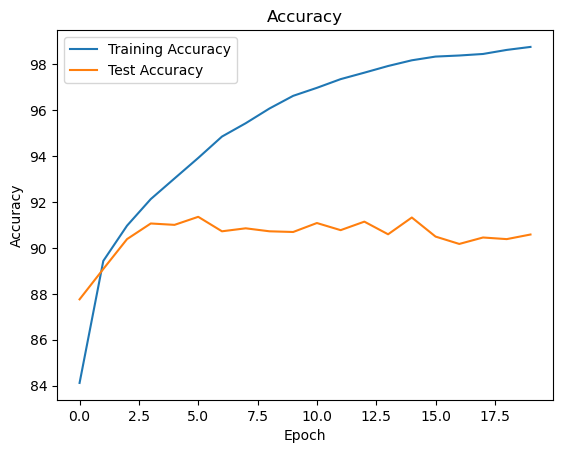

In [22]:
plt.plot(train_acc_history, label='Training Accuracy')
plt.plot(test_acc_history, label='Test Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

